# 3b. Fitting carbonate and SO$_2$ peaks
- This notebook shows how to fit secondary peaks, such as carbonate and S-rich phases in vapour bubbles and fluid inclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from tqdm import tqdm
pf.__version__

'0.0.81'

In [2]:
# Here, we are loading in the settings files from Step1. If all you want to do is find secondary phases, paste that code here
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

In [3]:
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spec', 'CRR', 'secphase']
Diad_Files=pf.get_files(path=spectra_path, file_ext=spectra_file_ext, exclude_str=exclude_str)
print(Diad_Files)
File_df=pd.DataFrame(data={'filename': Diad_Files})

['10mol_FID_R1.txt', '10mol_FID_R1_FIN.txt', '10mol_FID_R2.txt', '10mol_FID_R2_FIN.txt', '10mol_FID_R3.txt', '10mol_FID_R3_FIN.txt', '10mol_FIE_R1.txt', '10mol_FIE_R1_FIN.txt', '10mol_FIE_R2.txt', '10mol_FIE_R2_FIN.txt', '10mol_FIE_R3.txt', '10mol_FIE_R3_FIN.txt', '1mol_FIA_R1.txt', '1mol_FIA_R2.txt', '1mol_FIA_R3.txt', '1mol_FIB_R1.txt', '1mol_FIB_R2.txt', '1mol_FIB_R3.txt', '4mol_FID_R1.txt', '4mol_FID_R2.txt', '4mol_FID_R3.txt', 'AutoCalibration - Laser 532.05 nm - Grating 1800 - Coeff 0.00429475  PASS-postcrash.txt', 'LL8_404a_r1.txt', 'LL8_404a_r2.txt', 'LL8_404a_r3.txt', 'LL8_612_a_r1.txt', 'LL8_612_a_r2.txt', 'LL8_612_a_r3.txt', 'LL8_612_c_r1.txt', 'LL8_612_c_r2.txt', 'LL8_612_c_r3.txt', 'LL8_615_r1.txt', 'LL8_615_r2.txt', 'LL8_615_r3.txt', 'LL8_622B_R1.txt', 'LL8_622B_R2.txt', 'LL8_622B_R3.txt', 'LL8_624_r1.txt', 'LL8_624_r2.txt', 'LL8_624_r3.txt', 'LL8_626_MI_r1.txt', 'LL8_626_MI_r2.txt', 'LL8_626_MI_r3.txt', 'LL8_631_a_r1.txt', 'LL8_631_a_r2.txt', 'LL8_631_a_r3.txt', 'LL8_631

## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


## Best method - uses scipy find peaks, with the same peak parameters as used throughout Diad Fit

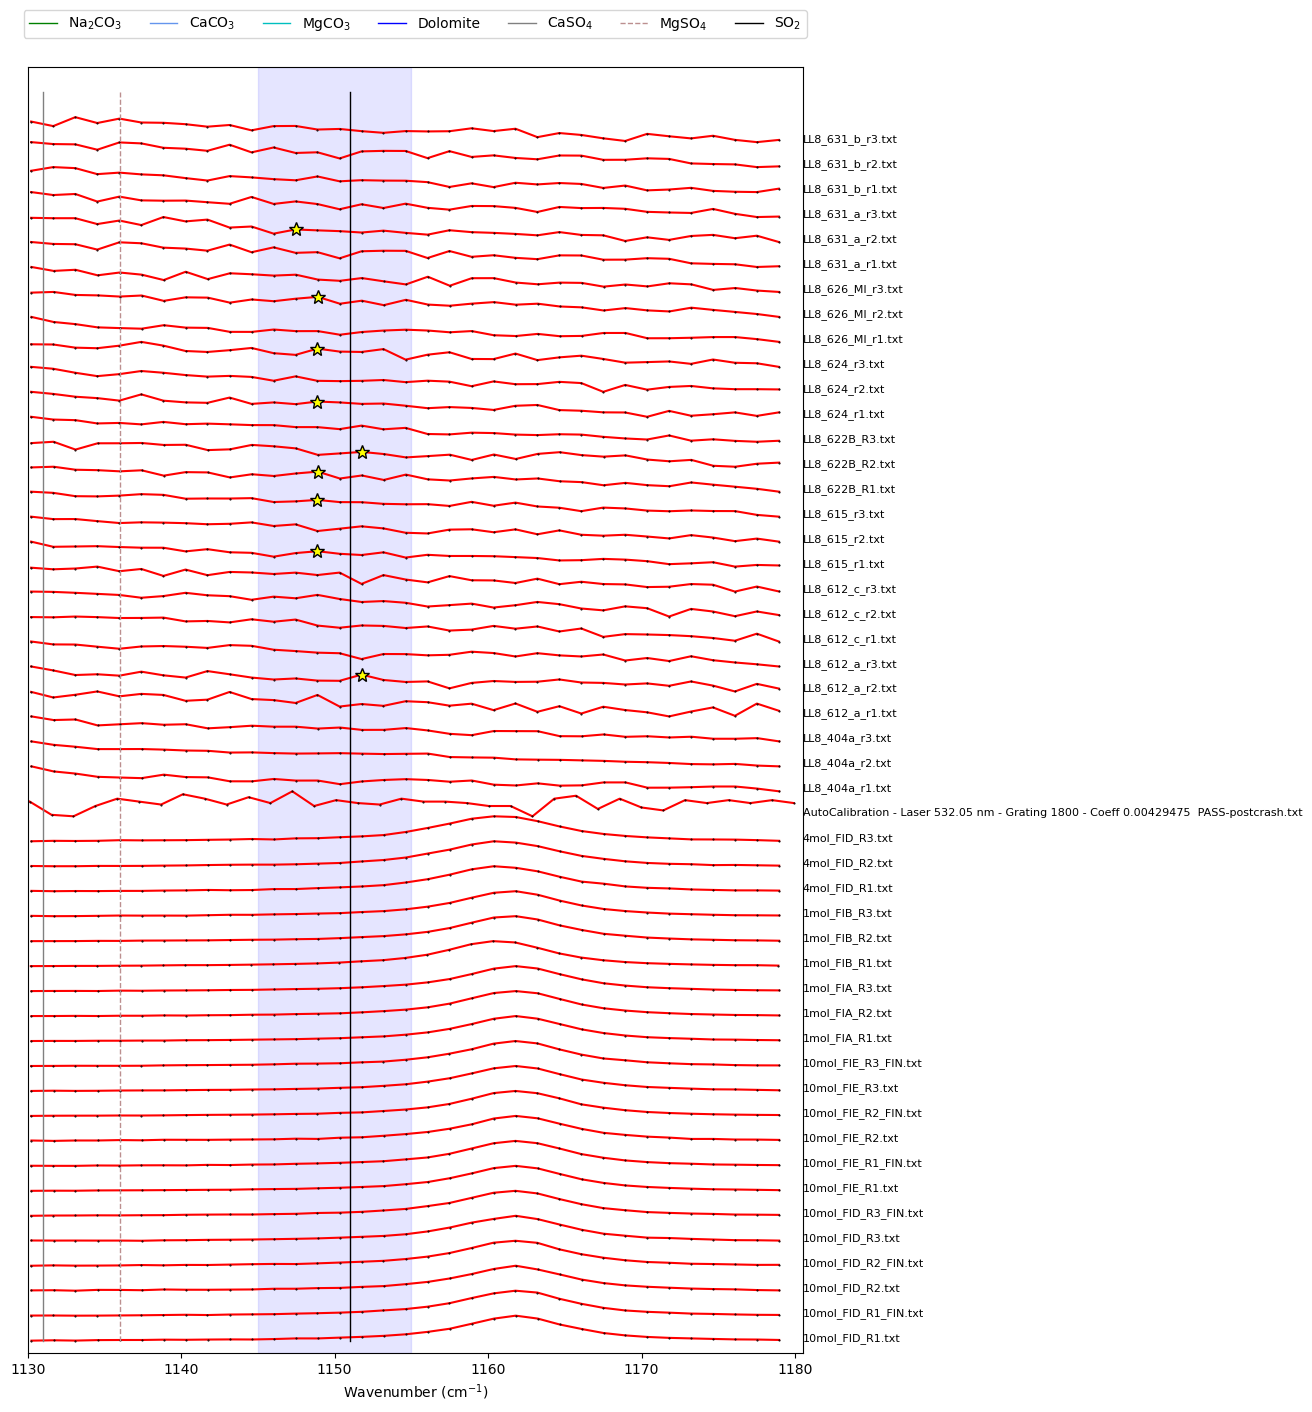

In [4]:
prominence_SO2=20
height_SO2=20
width_SO2=1
threshold_SO2=1

SO2_peaks_scipy, x_data_scipy, y_data_scipy, fig_scipy=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
filetype=spectra_filetype, find_peaks_filter=True,  
xlim_peaks=[1145, 1155], xlim_plot=[1130, 1180], yscale=0.3,
prominence=prominence_SO2, height=height_SO2, width=width_SO2, threshold=threshold_SO2)

SO2_peaks=SO2_peaks_scipy

## Find peaks filtering on peak position and prominence so just loop through these files

In [5]:
# Remove the ones where it didnt find SO2
SO2_notNa=np.isnan(SO2_peaks['pos'])
# Remove ones with a prominence less than this. 
prom_filt=10
SO2_filter=((SO2_peaks['prom']>10))&(~SO2_notNa)
print('Number kept with this filter:')
print(sum(SO2_filter))
print('Number discarded:')
print(sum(~SO2_filter&(~SO2_notNa)))
filenames_SO2=list(File_df['filename'].loc[SO2_filter])
print('filenames with SO2:')
print(filenames_SO2)

Number kept with this filter:
8
Number discarded:
1
filenames with SO2:
['LL8_612_a_r2.txt', 'LL8_615_r1.txt', 'LL8_615_r3.txt', 'LL8_622B_R1.txt', 'LL8_624_r1.txt', 'LL8_624_r3.txt', 'LL8_626_MI_r2.txt', 'LL8_631_a_r2.txt']


### Choose a filename to test peak fits

In [6]:
if sum(SO2_filter)>0:
    filename=filenames_SO2[0]

### Set up configuration file for S peak fitting

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1160, 1180], model_name='Spline', x_range_bck=5, N_poly_carb_bck=1, amplitude=1000, cent=1150, outlier_sigma=12, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, return_other_params=False, N_peaks=1, int_cut_off=0.1)


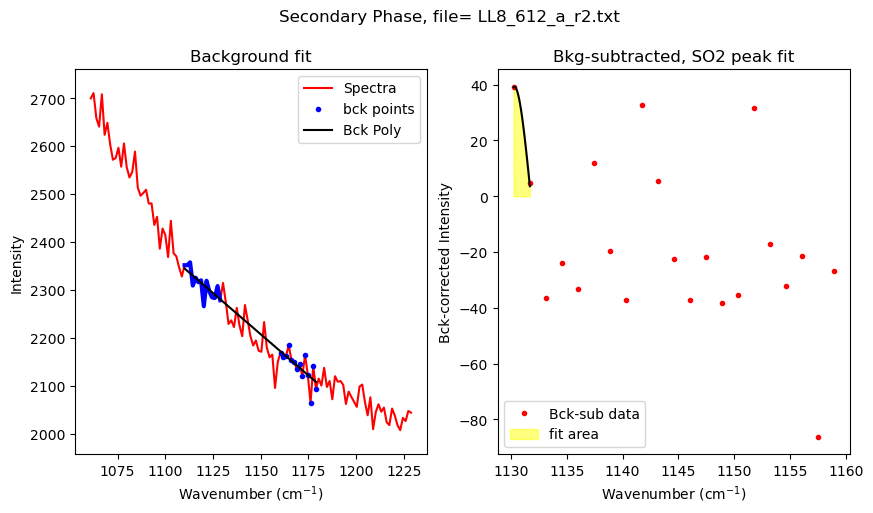

In [7]:
if sum(SO2_filter)>0:
    SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
    upper_bck=[1160, 1180], cent=1150, x_range_bck=5, N_peaks=1,   model_name='Spline', int_cut_off=0.1)
    print(SO2_peak_config)

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
    path=spectra_path, filename=filename, filetype=spectra_filetype, 
     plot_figure=True)

## Now lets loop through files

 25%|██▌       | 2/8 [00:00<00:01,  4.62it/s]

peak at edge of window, setting params to nans
peak at edge of window, setting params to nans


100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


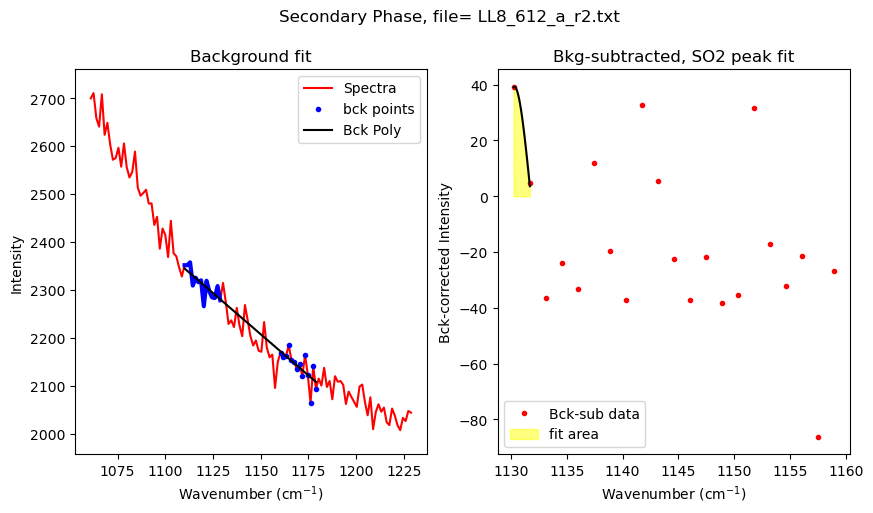

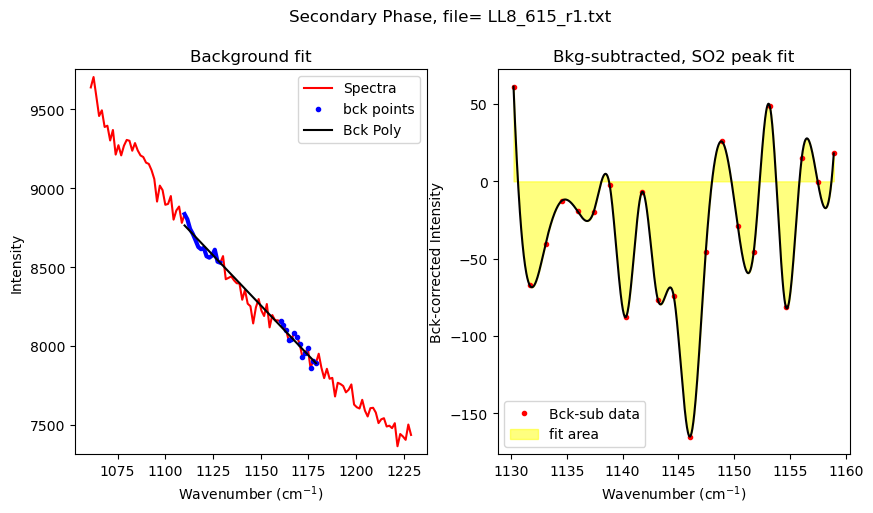

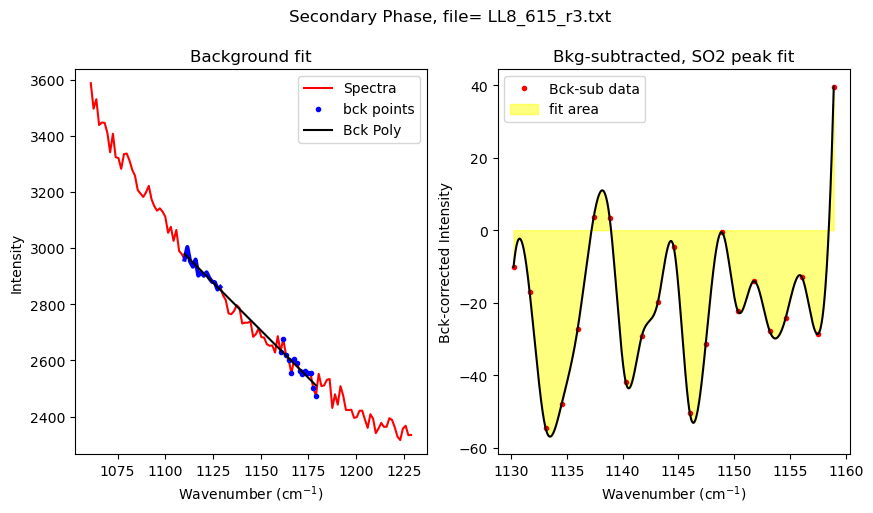

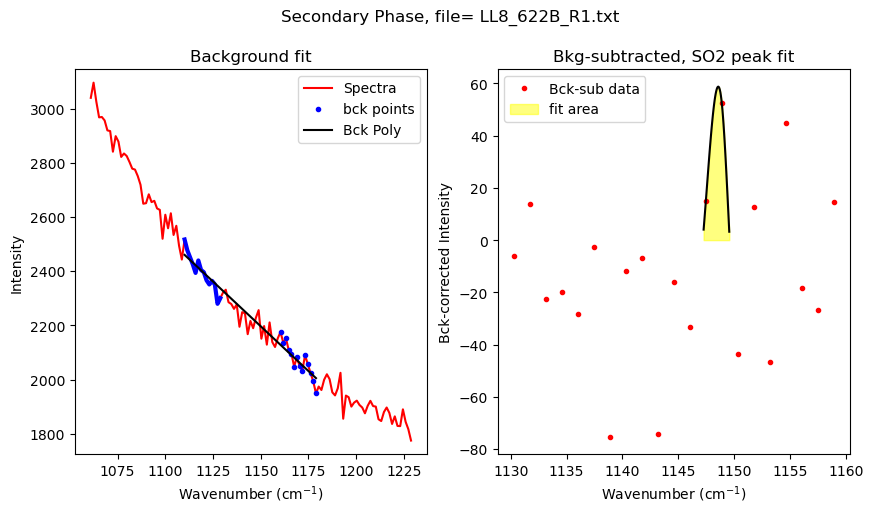

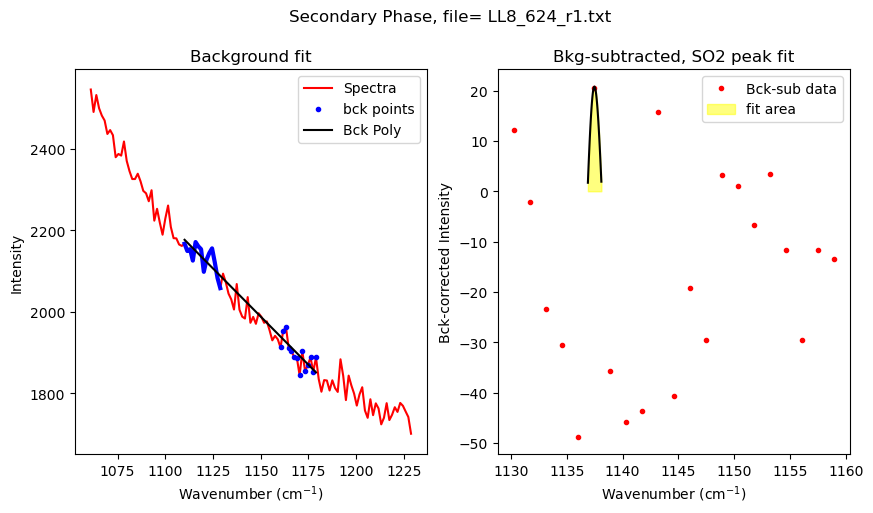

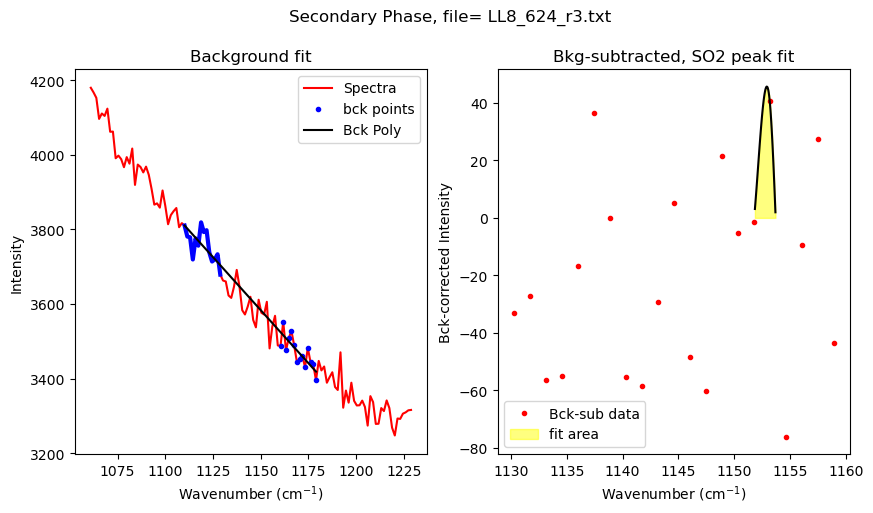

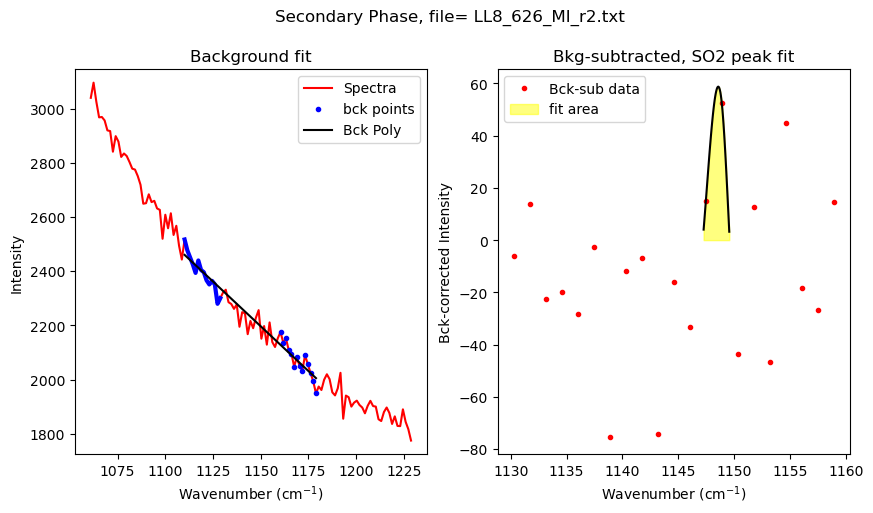

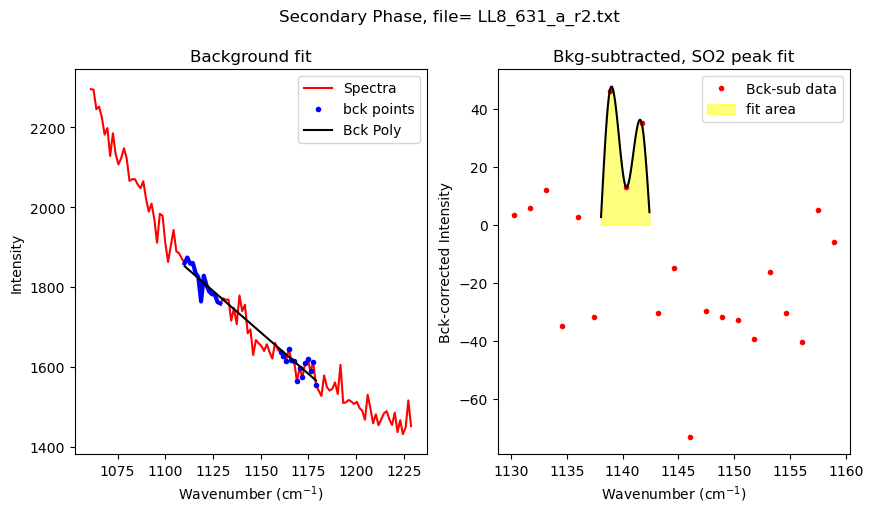

In [8]:
files_to_fit=filenames_SO2
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_SO2 = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)

### Plot peak areas and peak heights

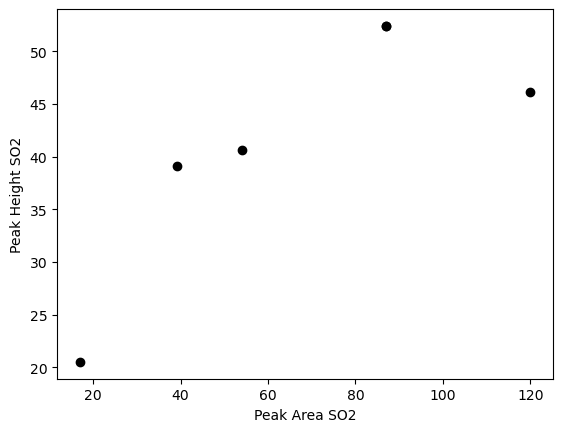

In [9]:
if sum(SO2_filter)>0:
    plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
            df_Merge_SO2['Peak_Height_SO2'], 'ok')
    plt.xlabel('Peak Area SO2')
    plt.ylabel('Peak Height SO2')
    # plt.yscale('log')
# plt.xscale('log')

### Save this to excel

In [10]:
if sum(SO2_filter)>0:
    df_Merge_SO2.to_excel('SO2_Peak_fits.xlsx', index=False)

## Now do the same to ID any carbonate peaks

## Using scipy find peaks methods

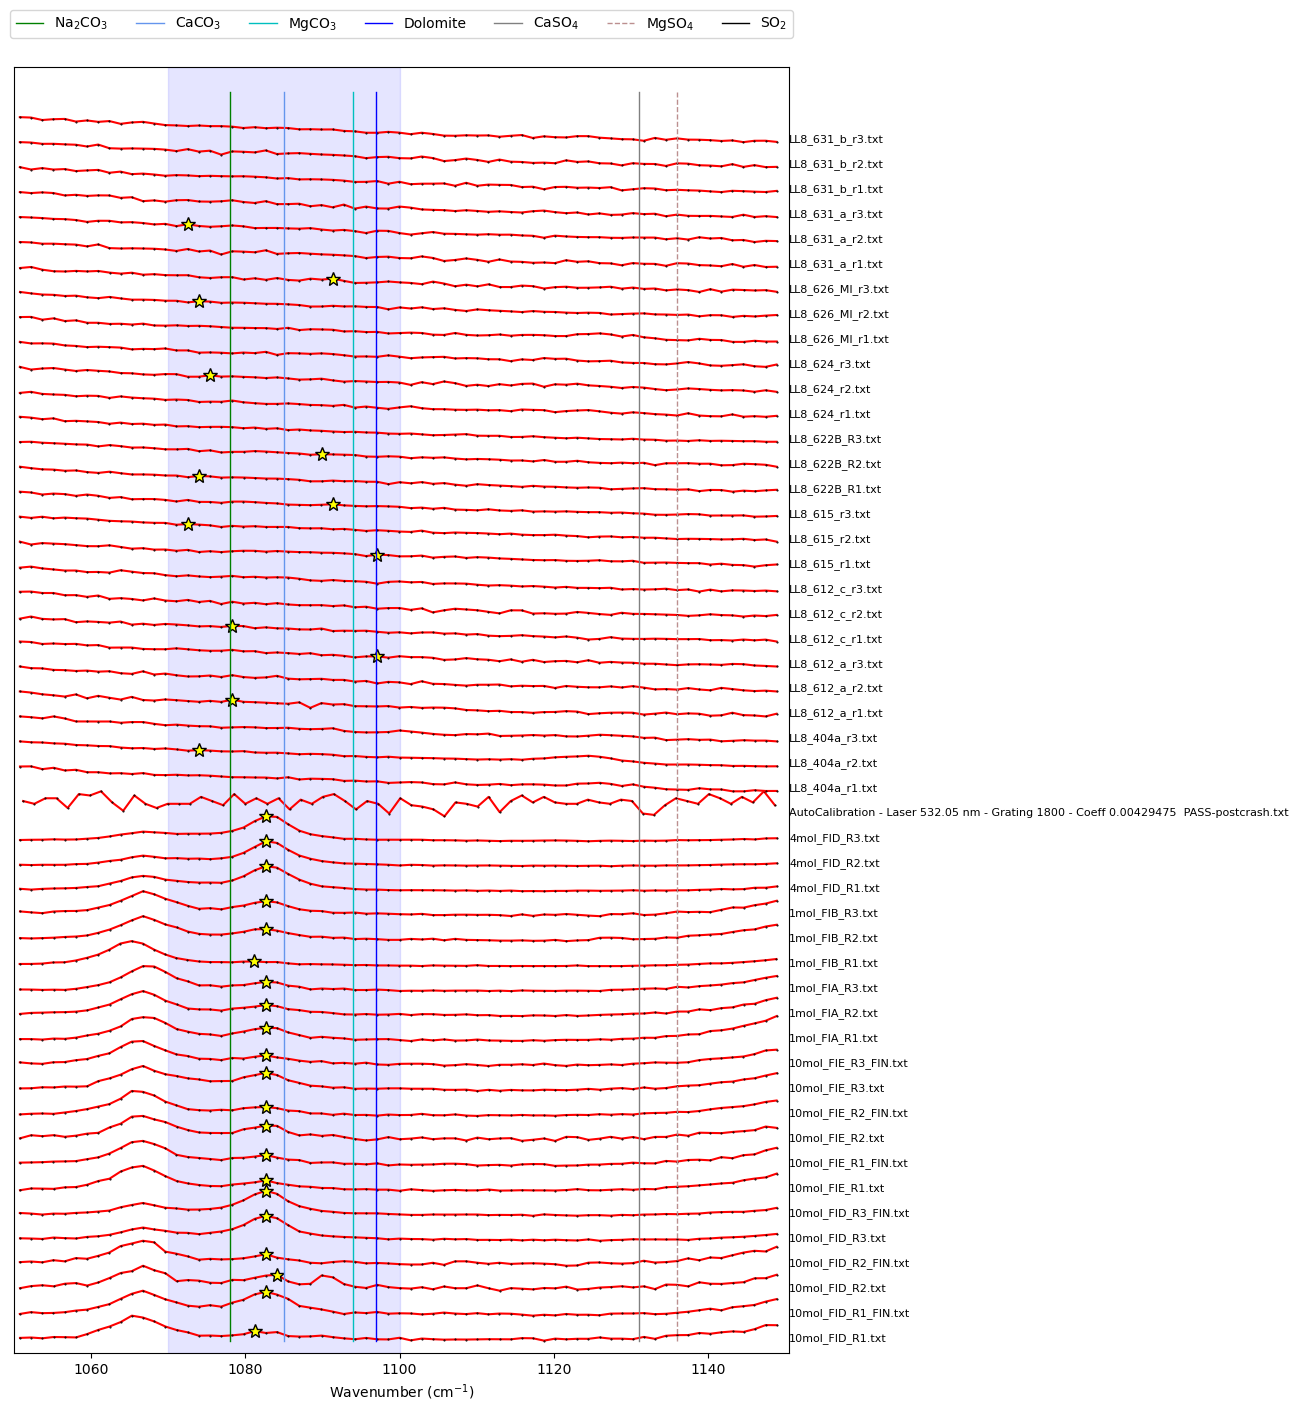

In [11]:

prominence_carb=30
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_scipy, x_data_scipy, y_data_scipy, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, find_peaks_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)
Carb_peaks=Carb_peaks_scipy

## Find ones with certain peak parameters to include

In [12]:
Carb_noNa=np.isnan(Carb_peaks['pos'])
prom_filter=30
Carb_filter=((Carb_peaks['prom']>prom_filter))&(~Carb_noNa)
print('Number kept with this filter:')
print(sum(Carb_filter))
print('Number discarded:')
print(sum(~Carb_filter&(~Carb_noNa)))
filenames_Carb=list(File_df['filename'].loc[Carb_filter])
print('filenames with carb:')
print(filenames_Carb)

Number kept with this filter:
29
Number discarded:
5
filenames with carb:
['10mol_FID_R1.txt', '10mol_FID_R1_FIN.txt', '10mol_FID_R2.txt', '10mol_FID_R2_FIN.txt', '10mol_FID_R3.txt', '10mol_FID_R3_FIN.txt', '10mol_FIE_R1.txt', '10mol_FIE_R1_FIN.txt', '10mol_FIE_R2.txt', '10mol_FIE_R2_FIN.txt', '10mol_FIE_R3.txt', '10mol_FIE_R3_FIN.txt', '1mol_FIA_R1.txt', '1mol_FIA_R2.txt', '1mol_FIA_R3.txt', '1mol_FIB_R1.txt', '1mol_FIB_R2.txt', '1mol_FIB_R3.txt', '4mol_FID_R1.txt', '4mol_FID_R2.txt', '4mol_FID_R3.txt', 'LL8_404a_r2.txt', 'LL8_612_a_r1.txt', 'LL8_612_c_r1.txt', 'LL8_615_r2.txt', 'LL8_622B_R1.txt', 'LL8_624_r2.txt', 'LL8_626_MI_r2.txt', 'LL8_631_a_r2.txt']


### Fit one to tweak parameters

generic_peak_config(name='Carb', lower_bck=[1050, 1070], upper_bck=[1120, 1150], model_name='Spline', x_range_bck=50, N_poly_carb_bck=2, amplitude=1000, cent=1090, outlier_sigma=12, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, return_other_params=False, N_peaks=1, int_cut_off=0.05)


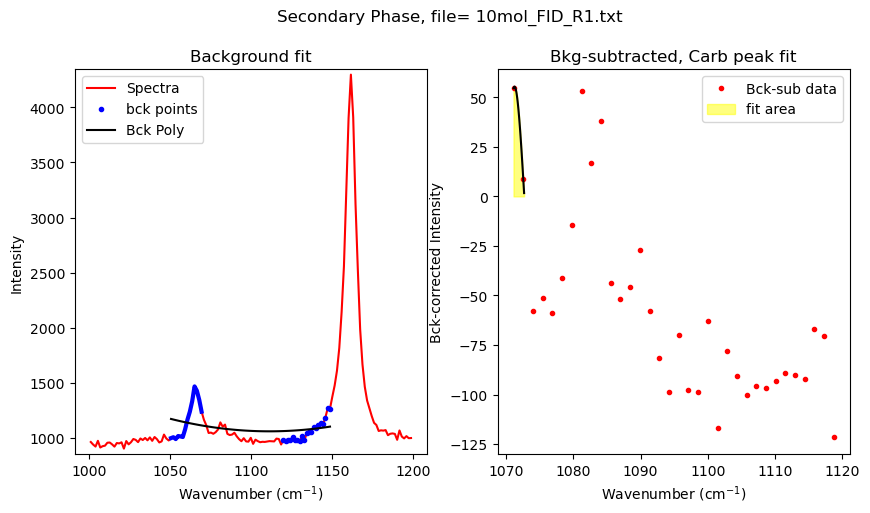

In [13]:
if sum(Carb_filter)>0:
    filename_carb=filenames_Carb[0]

    Carb_peak_config=pf.generic_peak_config(name='Carb', lower_bck=[1050, 1070],
    upper_bck=[1120, 1150], cent=1090, x_range_bck=50, N_poly_carb_bck=2, model_name='Spline')
    print(Carb_peak_config)

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
    path=spectra_path, filename=filename_carb, filetype=spectra_filetype,
     plot_figure=True)

### Loop over all carbonate files

 34%|███▍      | 10/29 [00:02<00:04,  4.20it/s]

peak at edge of window, setting params to nans


 55%|█████▌    | 16/29 [00:03<00:02,  4.67it/s]

peak at edge of window, setting params to nans
peak at edge of window, setting params to nans


 69%|██████▉   | 20/29 [00:04<00:01,  4.77it/s]c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\diads.py:3760: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
100%|██████████| 29/29 [00:06<00:00,  4.33it/s]


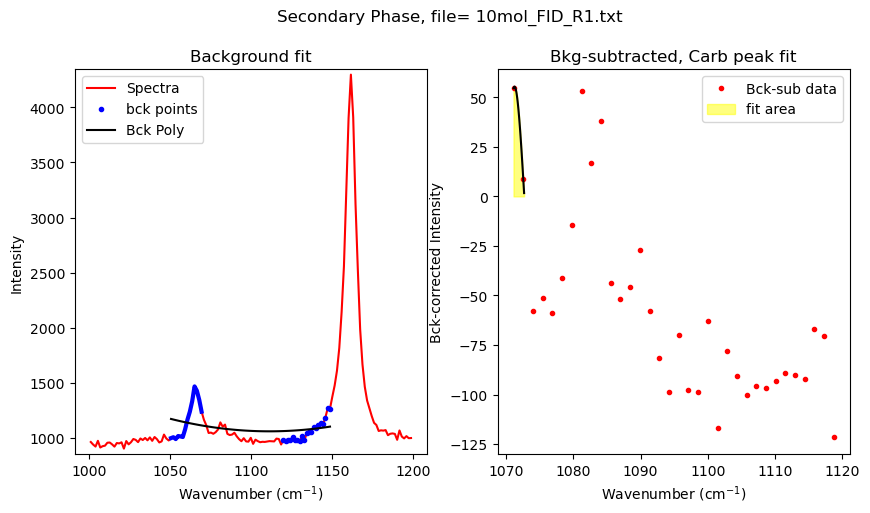

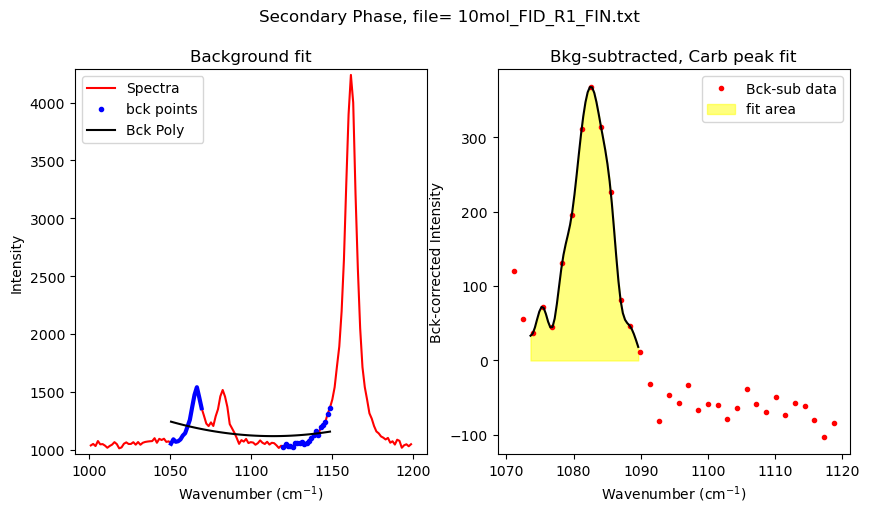

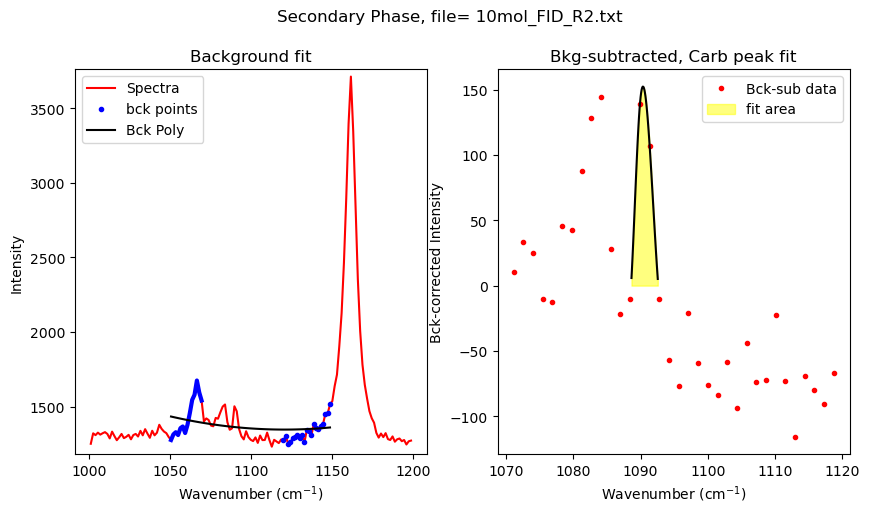

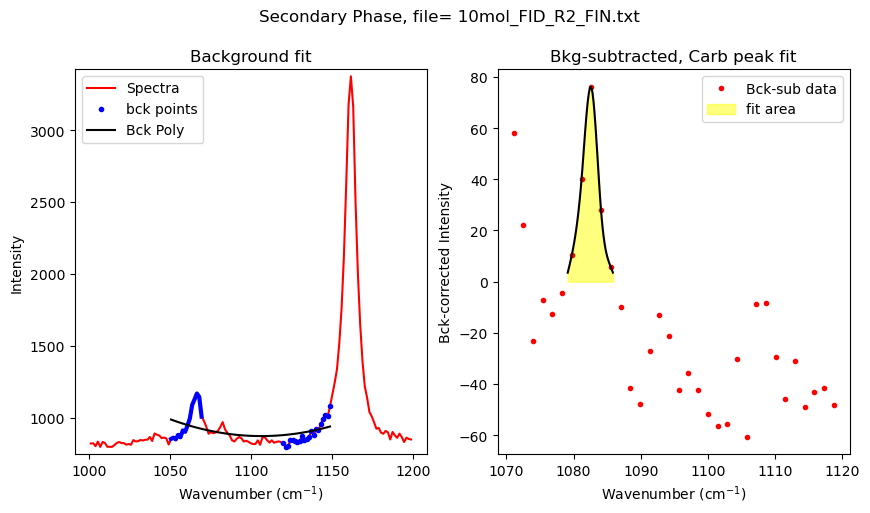

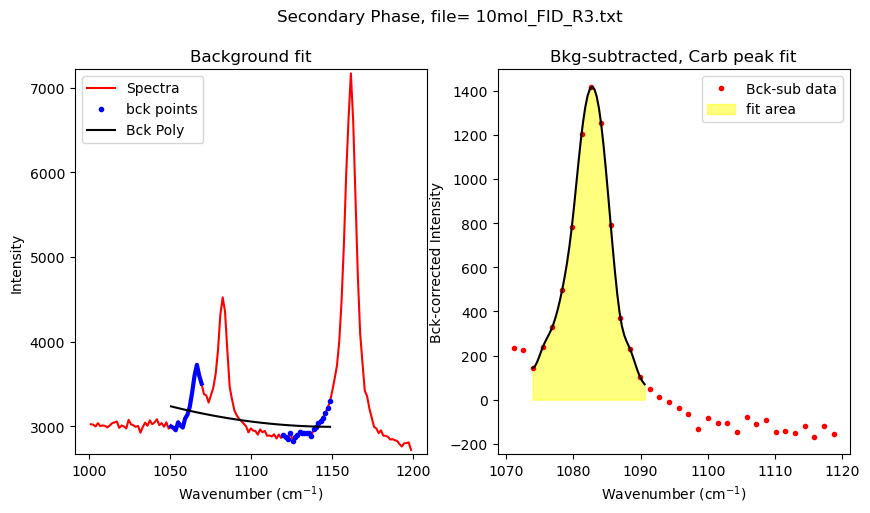

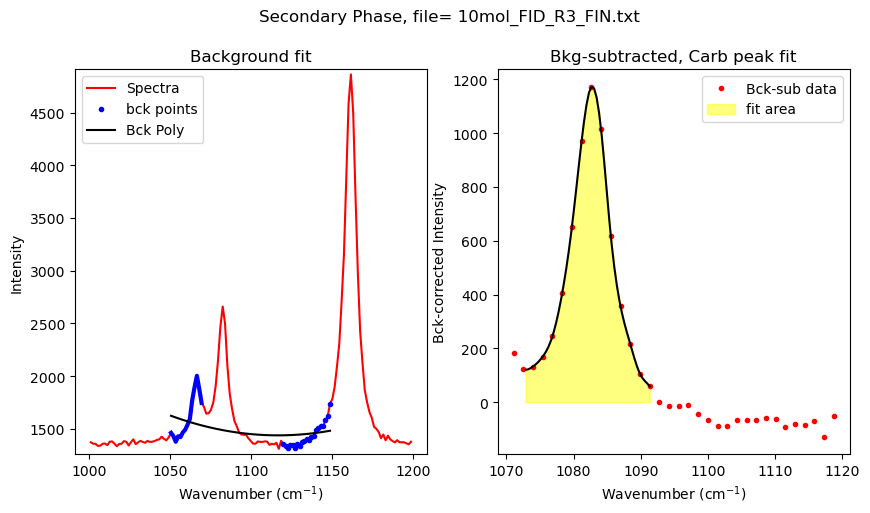

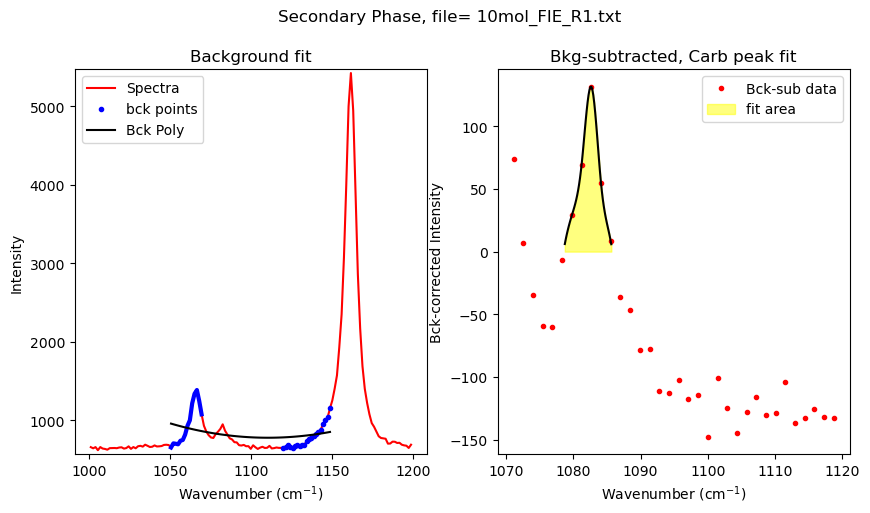

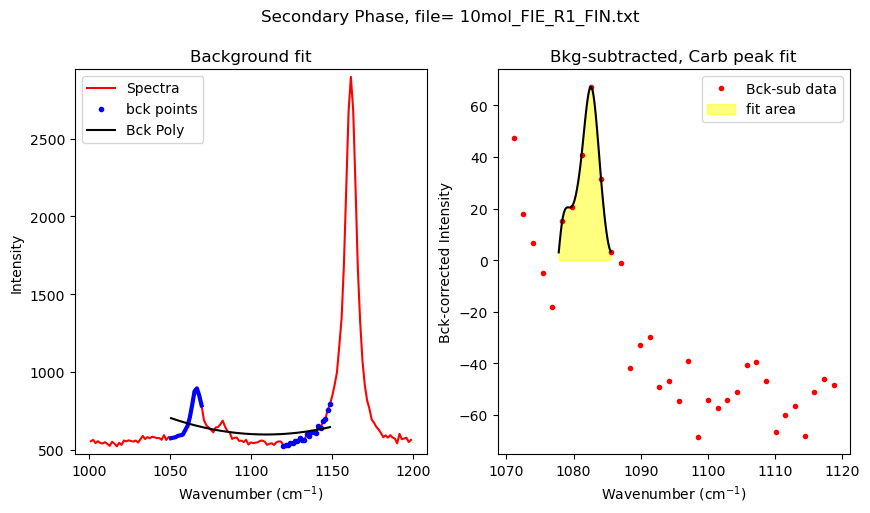

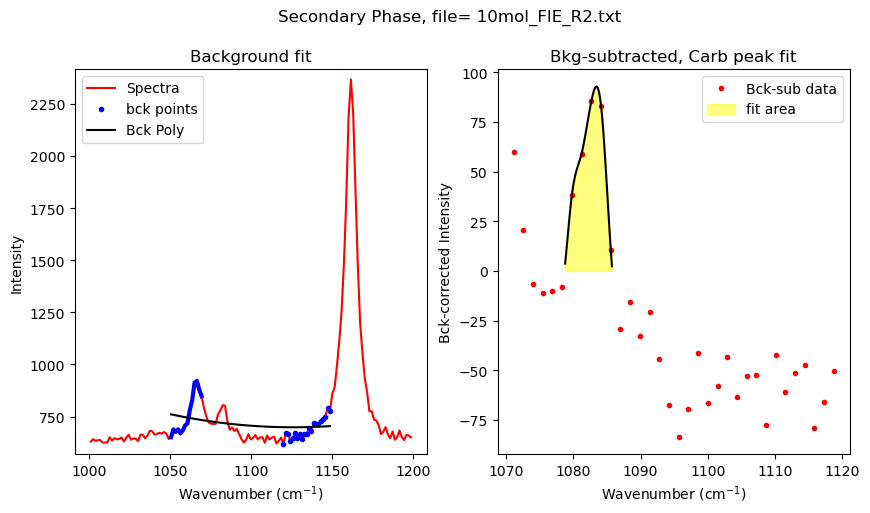

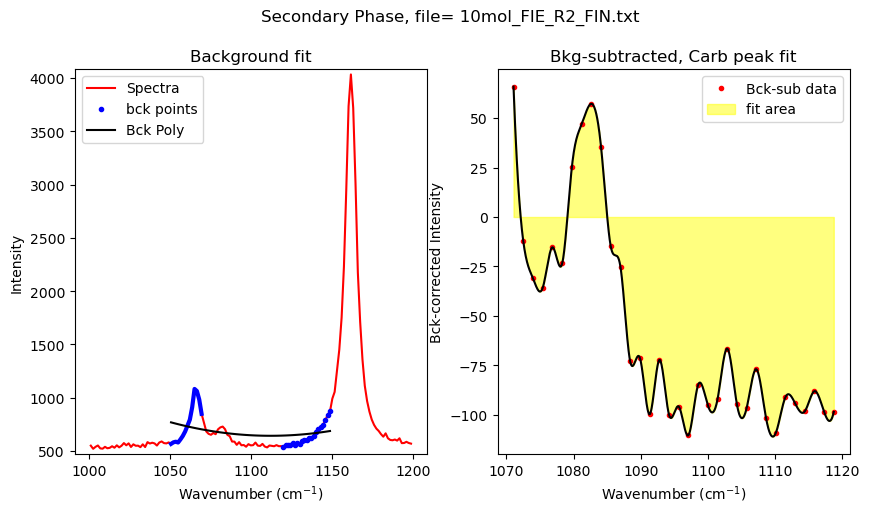

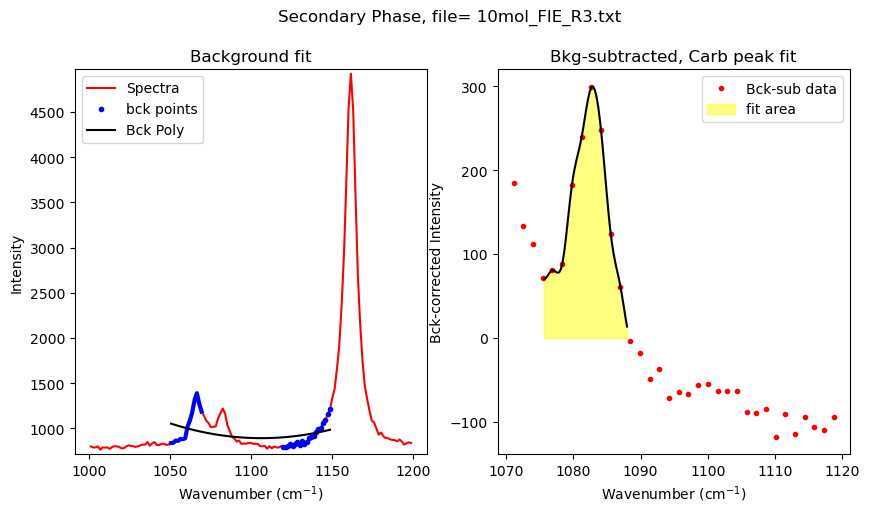

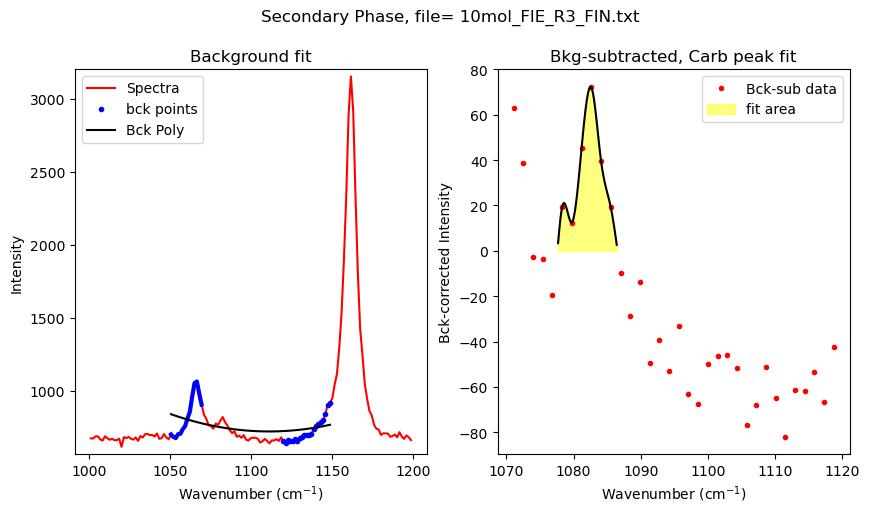

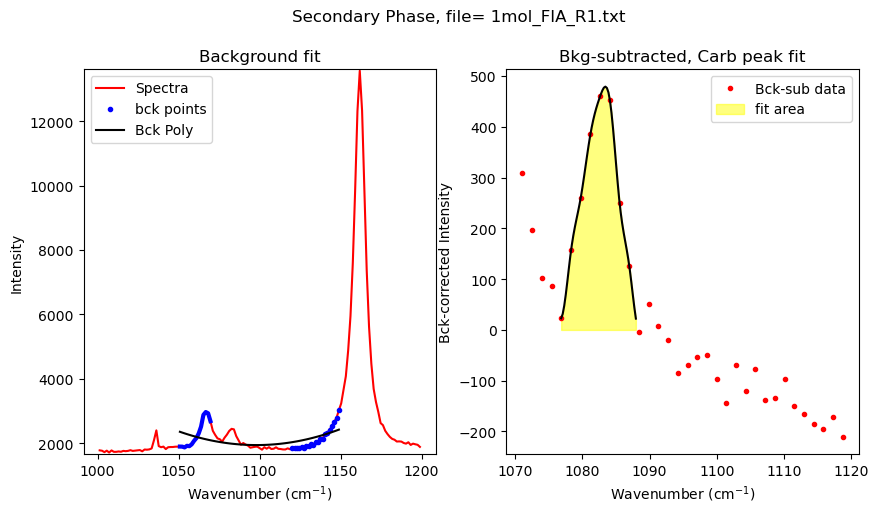

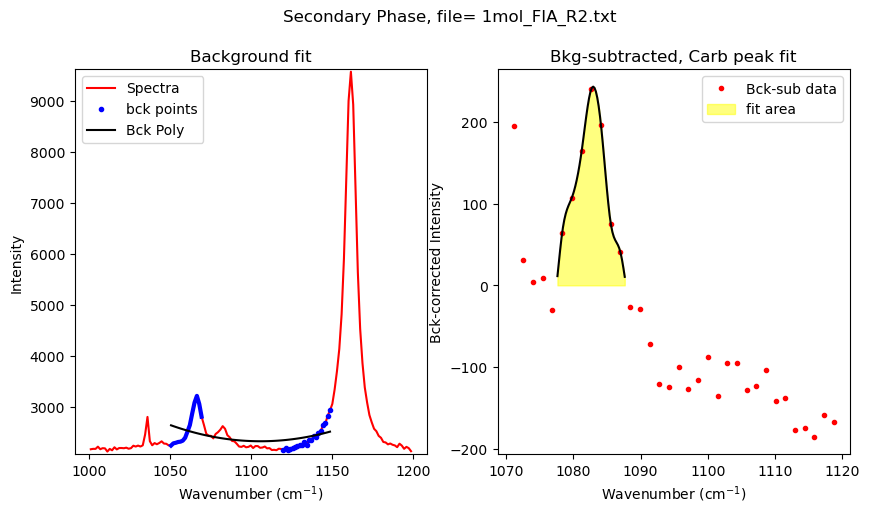

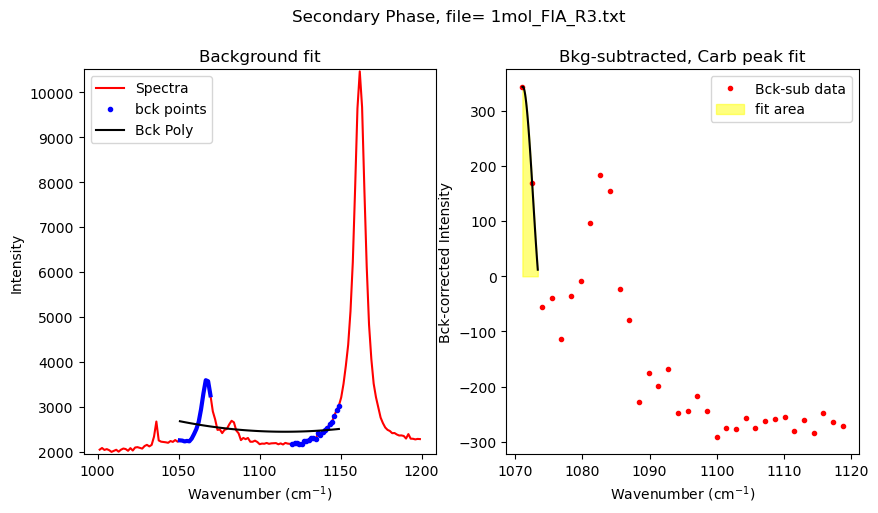

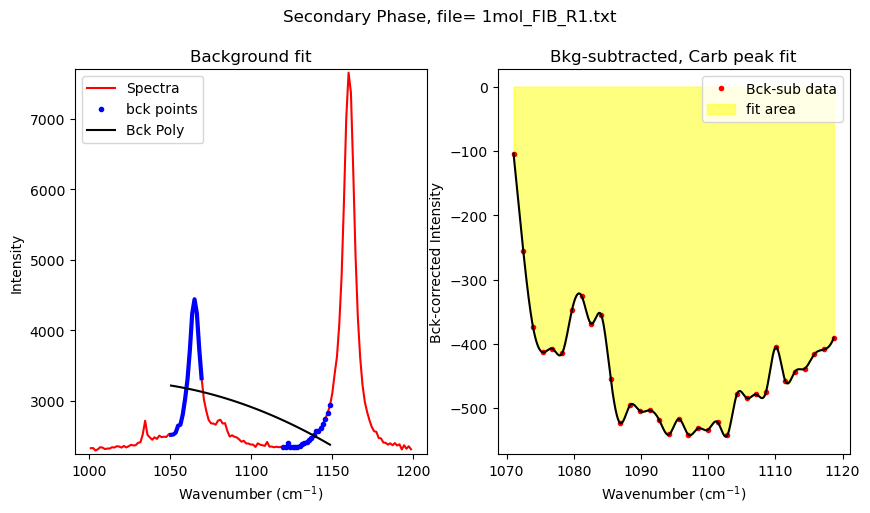

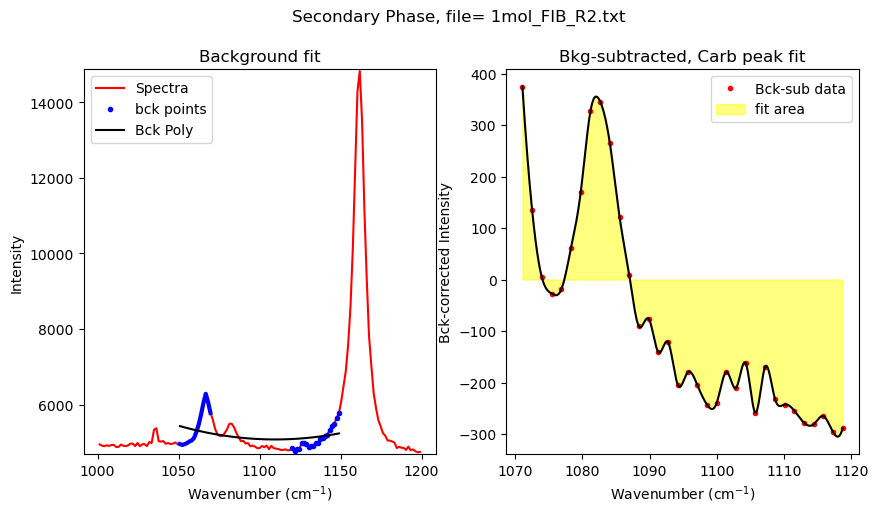

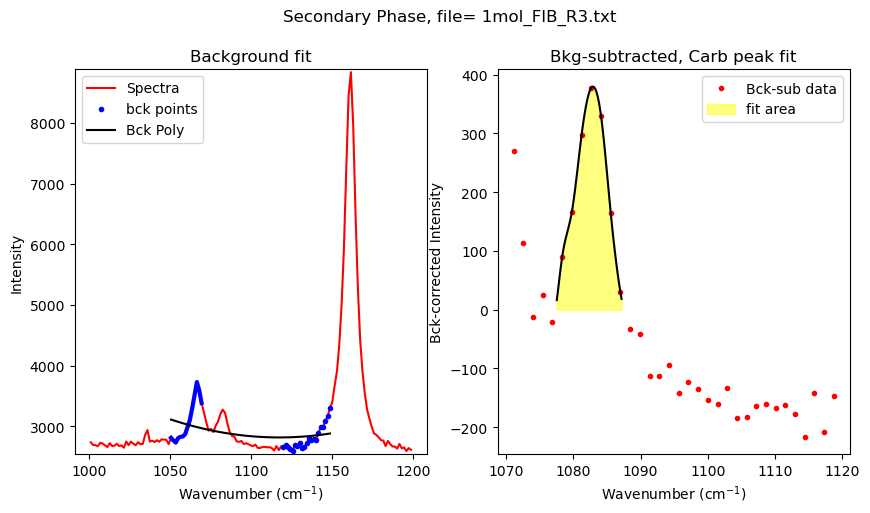

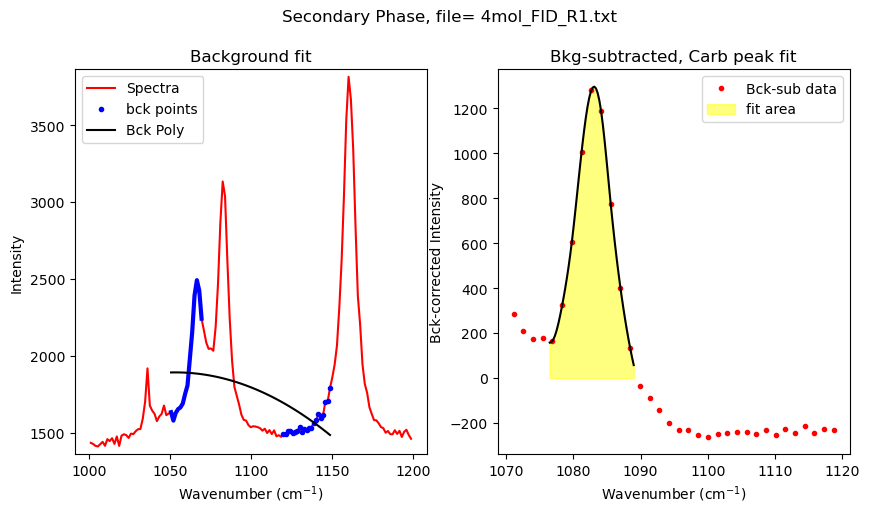

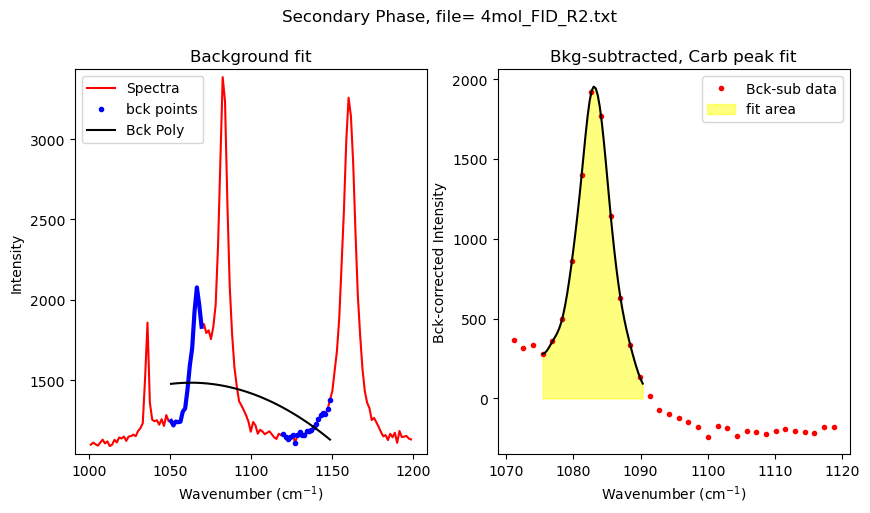

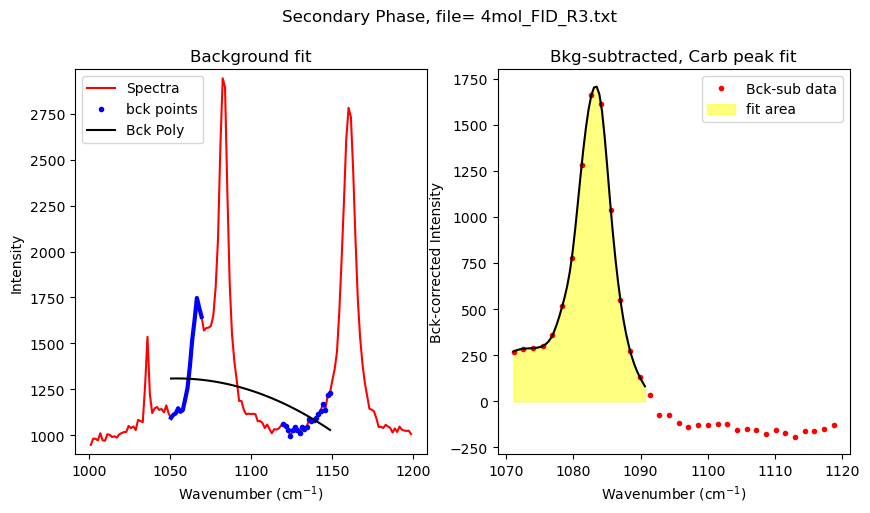

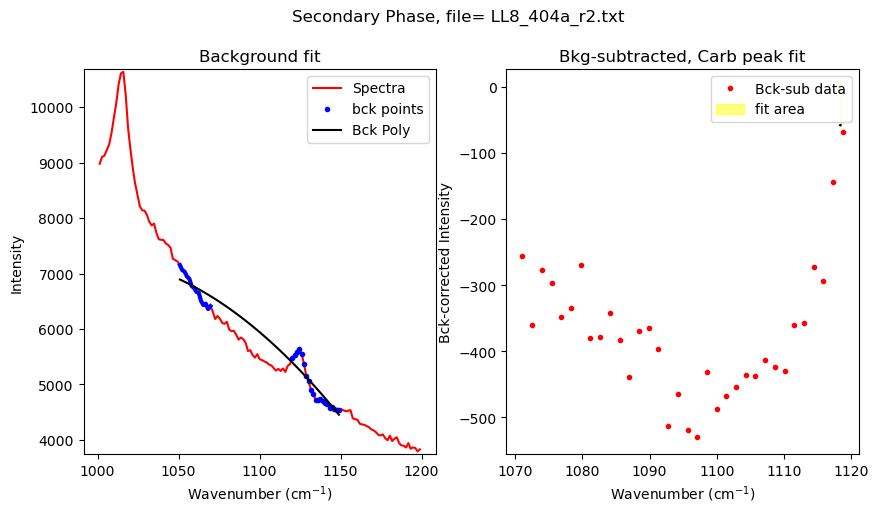

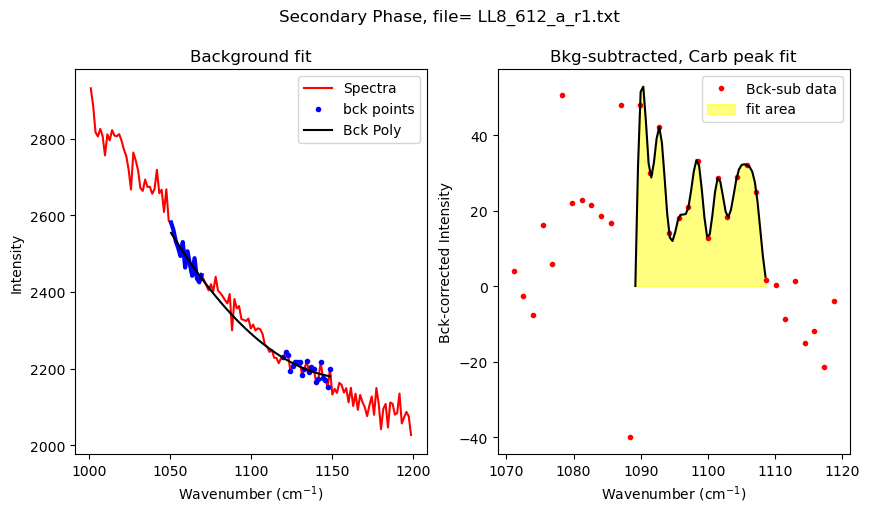

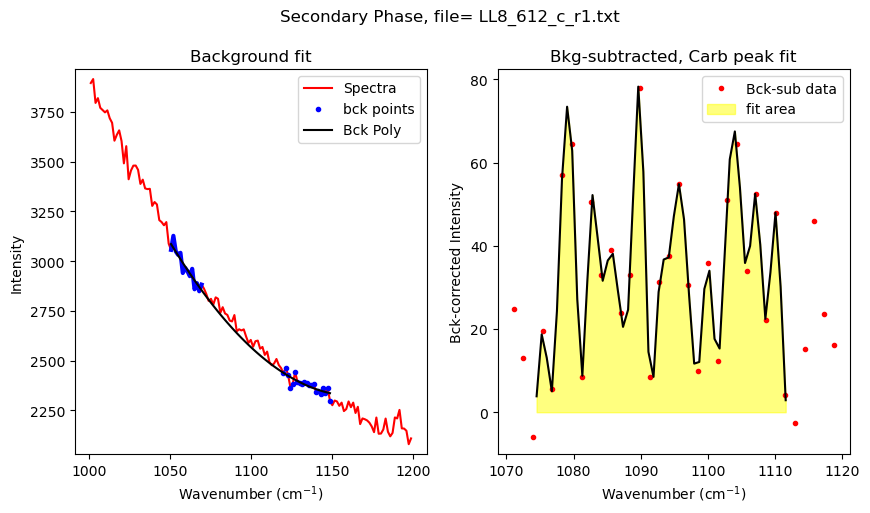

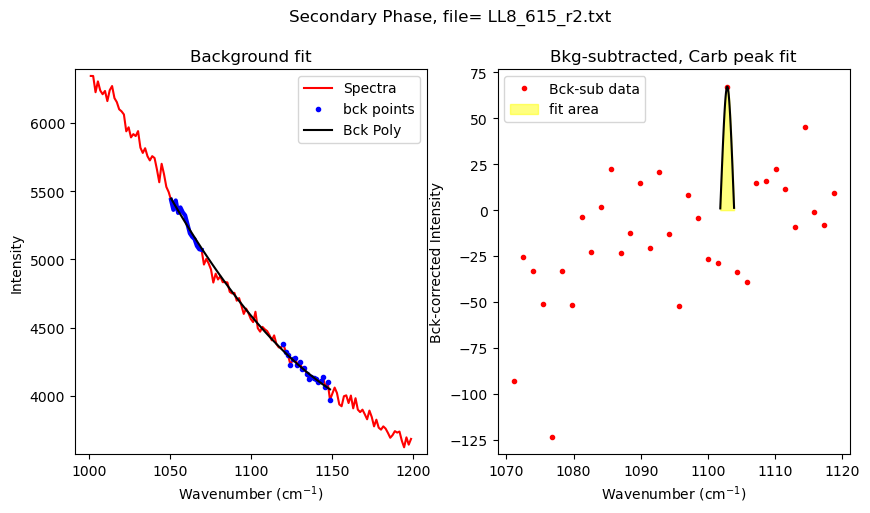

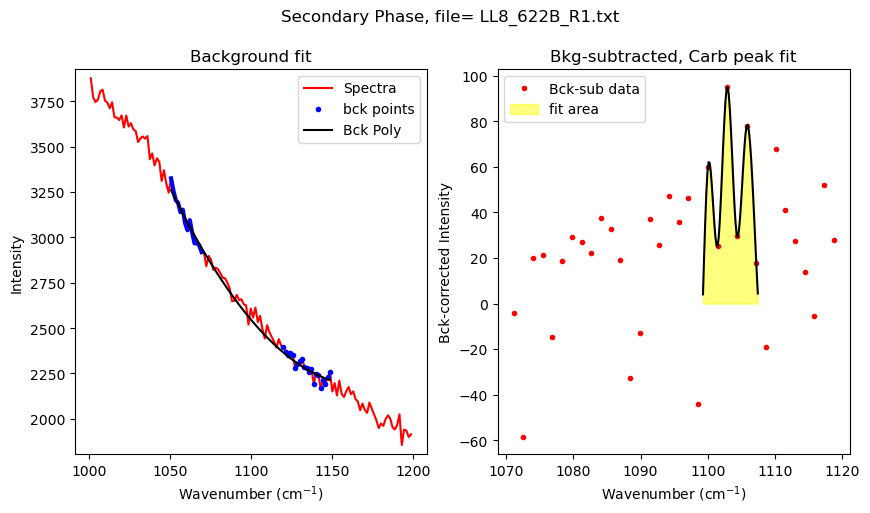

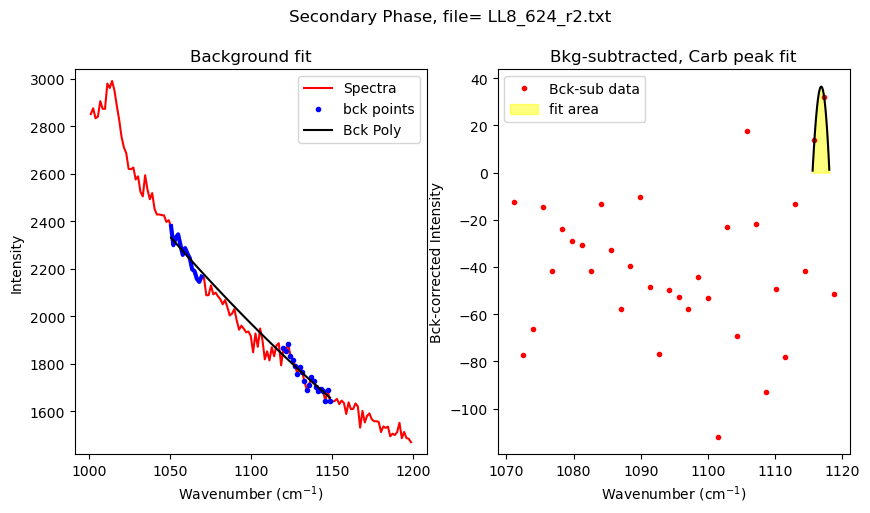

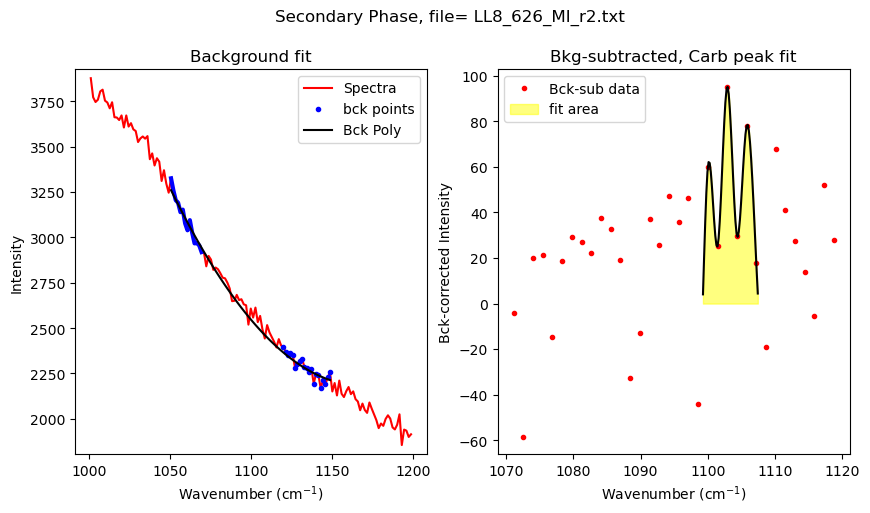

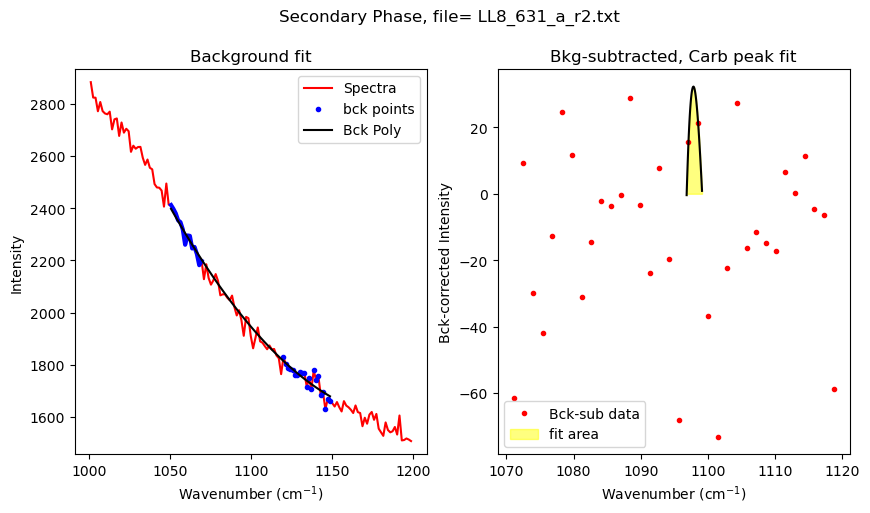

In [14]:
files_to_fit=filenames_Carb
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_Carb = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)

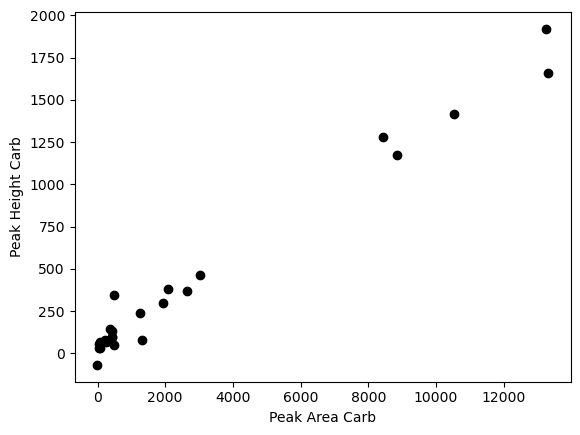

In [15]:
if sum(Carb_filter)>0:
    plt.plot(df_Merge_Carb['Peak_Area_Carb'], 
        df_Merge_Carb['Peak_Height_Carb'], 'ok')
    plt.xlabel('Peak Area Carb')
    plt.ylabel('Peak Height Carb')
# plt.yscale('log')
# plt.xscale('log')

## Save to excel

In [16]:
if sum(Carb_filter)>0:
    df_Merge_Carb.to_excel('Carb_Peak_fits.xlsx', index=False )

In [17]:
df_Merge_Carb

filename  Peak_Cent_Carb  Peak_Area_Carb  Peak_Height_Carb  \
0      10mol_FID_R1.txt     1071.223093       58.546368         54.597974   
0  10mol_FID_R1_FIN.txt     1082.555145     2643.114557        368.120044   
0      10mol_FID_R2.txt     1090.349870      364.627225        144.092735   
0  10mol_FID_R2_FIN.txt     1082.555145      229.412134         75.956407   
0      10mol_FID_R3.txt     1082.765936    10547.978904       1417.887157   
0  10mol_FID_R3_FIN.txt     1082.793634     8854.619102       1172.247500   
0      10mol_FIE_R1.txt     1082.622843      423.811222        131.485526   
0  10mol_FIE_R1_FIN.txt     1082.555145      253.645028         67.267474   
0      10mol_FIE_R2.txt     1083.433704      400.961350         85.502506   
0  10mol_FIE_R2_FIN.txt             NaN             NaN               NaN   
0      10mol_FIE_R3.txt     1082.813634     1945.507300        298.822229   
0  10mol_FIE_R3_FIN.txt     1082.507447      295.828197         72.118408   
0       1mol_FIA_R1.txt     1083.433704     3040.726588        460.769640   
0       1mol_FIA_R2.txt     1082.909029     1268.694135        240.651632   
0       1mol_FIA_R3.txt     1071.127698      482.845617        343.261752   
0       1mol_FIB_R1.txt             NaN             NaN               NaN   
0       1mol_FIB_R2.txt             NaN             NaN               NaN   
0       1mol_FIB_R3.txt     1082.909029     2089.420594        377.769825   
0       4mol_FID_R1.txt     1083.052122     8429.910832       1280.192536   
0       4mol_FID_R2.txt     1083.052122    13246.684373       1920.431771   
0       4mol_FID_R3.txt     1083.290611    13317.598816       1660.714590   
0       LL8_404a_r2.txt     1118.396116       -5.532604        -69.061457   
0      LL8_612_a_r1.txt     1090.186777      501.022345         50.820247   
0      LL8_612_c_r1.txt     1089.757497     1310.607896         77.908555   
0        LL8_615_r2.txt     1102.874364       85.738832         67.192735   
0       LL8_622B_R1.txt     1102.894364      429.224297         95.283321   
0        LL8_624_r2.txt     1116.849790       61.002484         32.169180   
0     LL8_626_MI_r2.txt     1102.894364      429.224297         95.283321   
0      LL8_631_a_r2.txt     1097.818408       48.612613         28.869036   

  Model_name  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline  
0     Spline